Let's make two hypotheses:

1. Spam messages are usally longer than nonspam.
2. Spam messages usually have more punctuations than nonspam.

We will see if this is true, based on simple dataset.

In [ ]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

In [32]:
# Create text message lenght feature

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" ")) # Get the lenght of each text message, minus whitespaces
data.head()

,label,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,128
1,ham,"Nah I don't think he goes to usf, he lives aro...",49
2,ham,Even my brother is not like to speak with me. ...,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnamin...,135


In [33]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation]) # Return 1 if finds punctuation
    return round(count/(len(text) - text.count(" ")), 3)*100 # Get the percet of punctuations. Round to three

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x)) # Apply to the dataset

print(data.head())

  label                                          body_text  body_len  punct%
0  spam  Free entry in 2 a wkly comp to win FA Cup fina...       128     4.7
1   ham  Nah I don't think he goes to usf, he lives aro...        49     4.1
2   ham  Even my brother is not like to speak with me. ...        62     3.2
3   ham                I HAVE A DATE ON SUNDAY WITH WILL!!        28     7.1
4   ham  As per your request 'Melle Melle (Oru Minnamin...       135     4.4


In [ ]:
# Evaluate new features using histagrams

In [34]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

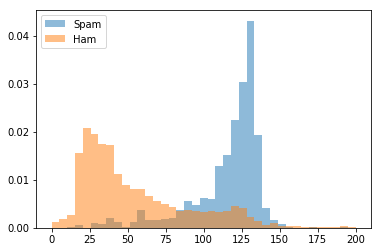

In [37]:
bins = np.linspace(0, 200, 40) # Create array with 40 evenly spaced numbers

plt.hist(data[data['label'] == 'spam']['body_len'], bins, alpha = 0.5, normed = True, label = 'Spam') # Spam
plt.hist(data[data['label'] == 'ham']['body_len'], bins, alpha = 0.5, normed = True, label = 'Ham') # Ham
plt.legend(loc = 'upper left') # Show the legend in upper left
plt.show()

What we learned from this plot is that spam messages are usually longer than correct messages.

In [ ]:
# Now let's check our percentage columns

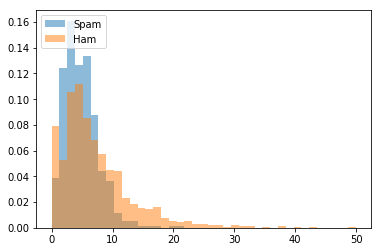

In [38]:
bins = np.linspace(0, 50, 40) # Change maximum to 50. We assume there was no >50% punctuation

plt.hist(data[data['label'] == 'spam']['punct%'], bins, alpha = 0.5, normed = True, label = 'Spam') # Spam
plt.hist(data[data['label'] == 'ham']['punct%'], bins, alpha = 0.5, normed = True, label = 'Ham') # Ham
plt.legend(loc = 'upper left') # Show the legend in upper left
plt.show()

Nothing interesting here. Both spam and ham seems to have similiar number of punctuations.
Few higher marks can't prove anything.

Based on data presented on both charts we can:

- confirm the first hypothesis
- rule out the second hypotesis